<a href="https://colab.research.google.com/github/MuraliSrinivasTech/CODSOFT/blob/main/CodSoft_DS_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


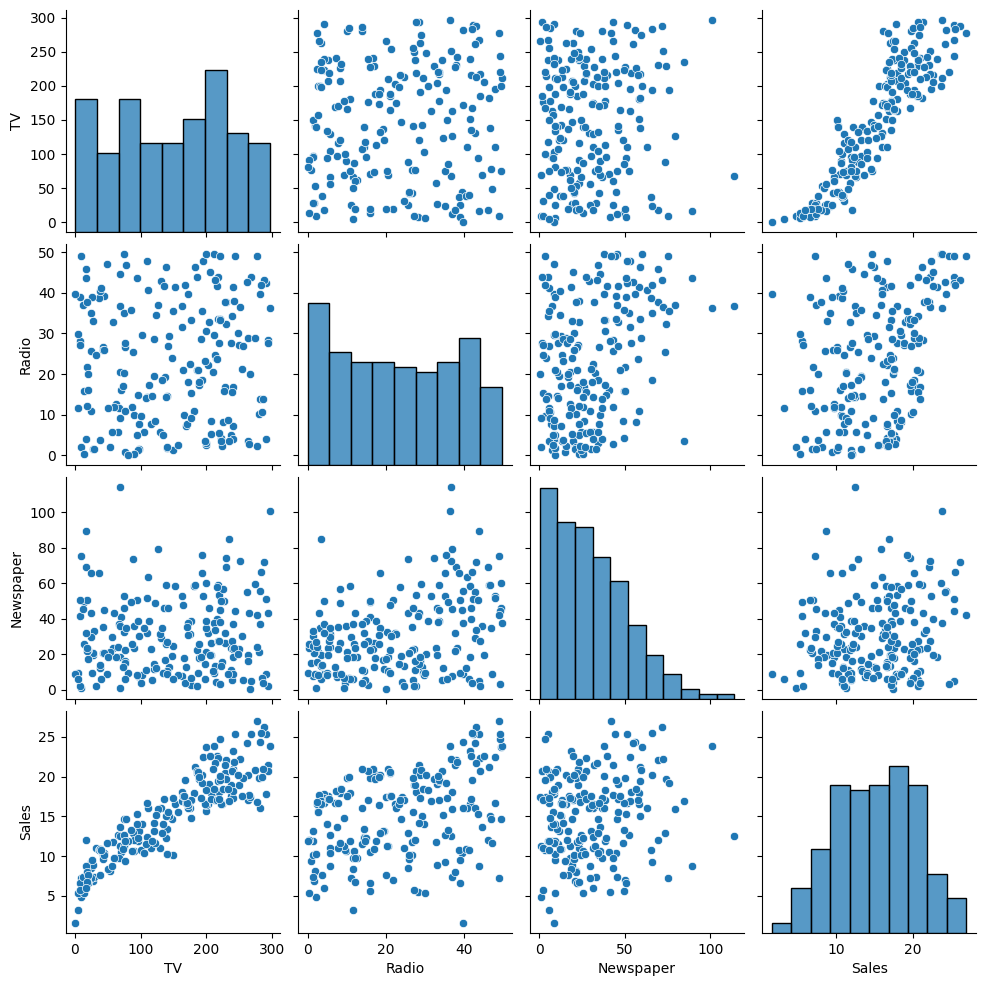

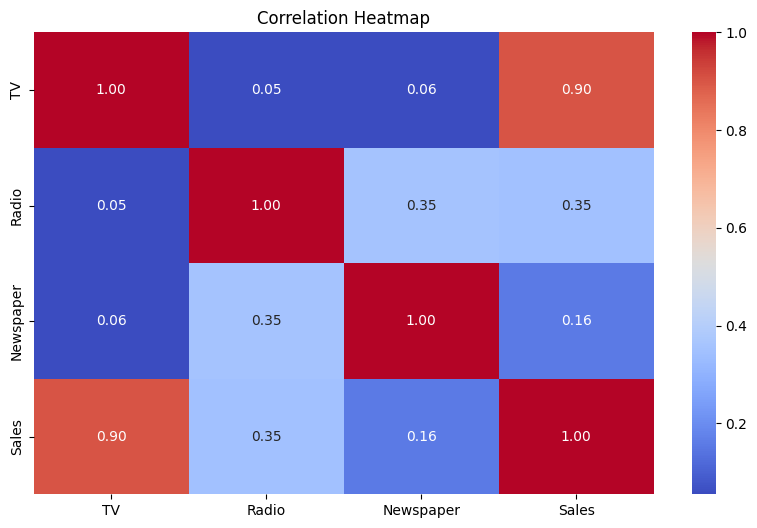

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
data.dropna(inplace=True)
data_encoded = pd.get_dummies(data, columns=['TV','Radio','Newspaper',], drop_first=True)
data_encoded.head()
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 34.22
Root Mean Squared Error: 5.85
R^2 Score: -0.11


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

best_y_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_y_pred)
best_rmse = mean_squared_error(y_test, best_y_pred, squared=False)
best_r2 = r2_score(y_test, best_y_pred)

print(f'Best Model Mean Squared Error: {best_mse:.2f}')
print(f'Best Model Root Mean Squared Error: {best_rmse:.2f}')
print(f'Best Model R^2 Score: {best_r2:.2f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Model Mean Squared Error: 30.25
Best Model Root Mean Squared Error: 5.50
Best Model R^2 Score: 0.02


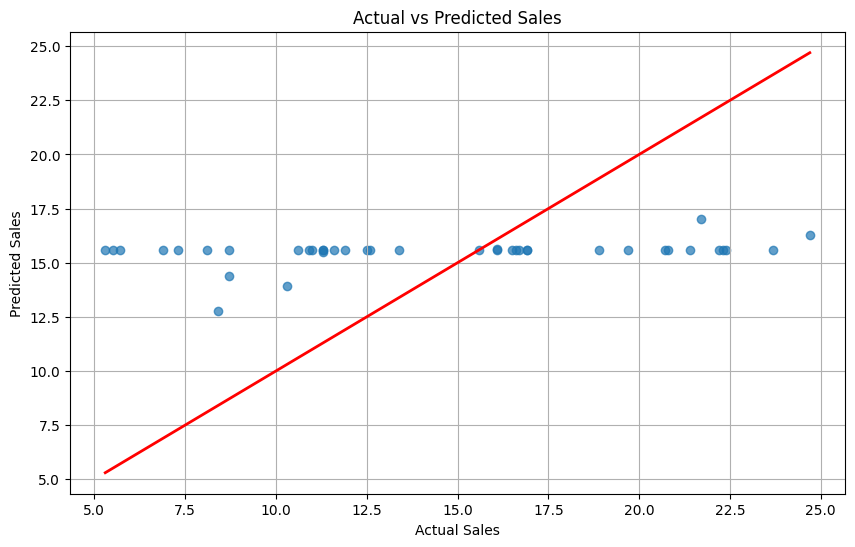

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()
